In [9]:
!apt-get install git-lfs
!git lfs install
!git clone https://huggingface.co/datasets/devkyle/ghanaian-food-dataset
git remote add origin https://github.com/Kennethdotse/ghanaian_food_vision.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Git LFS initialized.
Cloning into 'ghanaian-food-dataset'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14 (from 1)
Unpacking objects: 100% (14/14), 4.12 KiB | 1.37 MiB/s, done.


In [16]:
!ls ghanaian-food-dataset/data

ls: cannot access 'ghanaian-food-dataset/data/train': No such file or directory


In [1]:
!pip install timm -q
!pip install transformers -q
!pip install datasets -q
!pip install gradio -q

In [1]:
import torch
import numpy as np

In [3]:
from datasets import load_dataset

ds = load_dataset("devkyle/ghanaian-food-dataset")

train_ds = ds["train"]
test_ds = ds["validation"]



len(train_ds), len(test_ds)

(119, 30)

In [4]:
print(ds["train"].features)


{'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['Abolo Ghana', 'Agbeli kaklo', 'Apapransa Ghana', 'Banku Ghana', 'Ebunubunu Ghana', 'Fufu Ghana', 'Gari Soakings', 'Groundnut Soup Ghana', 'Hausa Koko', 'Jollof rice Ghana', 'Kelewele Ghana', 'Kenkey Ghana', 'Konkonte', 'Kontomire stew Ghana', 'Koose Ghana', 'Kyinkyinga Ghana', 'Okro Stew Ghana', 'Omotuo Ghana', 'Palmnut Soup Ghana', 'Red Red Ghana', 'Roasted plaintain Ghana', 'Tatale Ghana', 'Tubaani Ghana', 'Tuo Zaafi Ghana', 'Waakye Ghana', 'Yam porridge Ghana', 'fante kenkey', 'gobƐ Ghana', 'light soup Ghana', 'Ɛtɔ Ghana'])}


In [5]:
from collections import Counter

# Extract labels from the ds
labels = ds["train"]["label"]

# Count occurrences of each label
label_counts = Counter(labels)

# Map label IDs to class names (if available)
class_names = ds["train"].features["label"].names
label_counts_named = {class_names[label]: count for label, count in label_counts.items()}

print(label_counts_named)


{'Okro Stew Ghana': 4, 'Kenkey Ghana': 3, 'Apapransa Ghana': 4, 'Palmnut Soup Ghana': 4, 'Konkonte': 4, 'fante kenkey': 4, 'Fufu Ghana': 4, 'Ebunubunu Ghana': 4, 'Banku Ghana': 4, 'gobƐ Ghana': 4, 'Tatale Ghana': 4, 'Hausa Koko': 4, 'Agbeli kaklo': 4, 'Omotuo Ghana': 4, 'Groundnut Soup Ghana': 4, 'Yam porridge Ghana': 4, 'Koose Ghana': 4, 'Gari Soakings': 4, 'Jollof rice Ghana': 4, 'Kelewele Ghana': 4, 'Kyinkyinga Ghana': 4, 'Ɛtɔ Ghana': 4, 'Tuo Zaafi Ghana': 4, 'Red Red Ghana': 4, 'Roasted plaintain Ghana': 4, 'Kontomire stew Ghana': 4, 'Tubaani Ghana': 4, 'Waakye Ghana': 4, 'light soup Ghana': 4, 'Abolo Ghana': 4}


In [6]:
labelnames= train_ds.features["label"].names
print(labelnames)

['Abolo Ghana', 'Agbeli kaklo', 'Apapransa Ghana', 'Banku Ghana', 'Ebunubunu Ghana', 'Fufu Ghana', 'Gari Soakings', 'Groundnut Soup Ghana', 'Hausa Koko', 'Jollof rice Ghana', 'Kelewele Ghana', 'Kenkey Ghana', 'Konkonte', 'Kontomire stew Ghana', 'Koose Ghana', 'Kyinkyinga Ghana', 'Okro Stew Ghana', 'Omotuo Ghana', 'Palmnut Soup Ghana', 'Red Red Ghana', 'Roasted plaintain Ghana', 'Tatale Ghana', 'Tubaani Ghana', 'Tuo Zaafi Ghana', 'Waakye Ghana', 'Yam porridge Ghana', 'fante kenkey', 'gobƐ Ghana', 'light soup Ghana', 'Ɛtɔ Ghana']


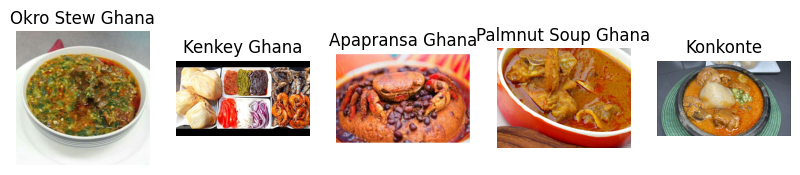

In [7]:
import matplotlib.pyplot as plt
#ds = ds['train']
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        image = dataset[i]["image"]
        label_id = dataset[i]["label"]
        labelname = labelnames[label_id]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f"{labelname}")
        plt.axis("off")
    plt.show()

# Show 5 images
show_images(train_ds)

In [8]:
classlabel = ds['train'].features['label']

class_names= classlabel.names
len(class_names)

30

In [9]:
id2label = {i: label for i, label in enumerate(class_names)}
label2id = {label: i for i, label in enumerate(class_names)}

print("id2label:", id2label)
print("label2id:", label2id)

id2label: {0: 'Abolo Ghana', 1: 'Agbeli kaklo', 2: 'Apapransa Ghana', 3: 'Banku Ghana', 4: 'Ebunubunu Ghana', 5: 'Fufu Ghana', 6: 'Gari Soakings', 7: 'Groundnut Soup Ghana', 8: 'Hausa Koko', 9: 'Jollof rice Ghana', 10: 'Kelewele Ghana', 11: 'Kenkey Ghana', 12: 'Konkonte', 13: 'Kontomire stew Ghana', 14: 'Koose Ghana', 15: 'Kyinkyinga Ghana', 16: 'Okro Stew Ghana', 17: 'Omotuo Ghana', 18: 'Palmnut Soup Ghana', 19: 'Red Red Ghana', 20: 'Roasted plaintain Ghana', 21: 'Tatale Ghana', 22: 'Tubaani Ghana', 23: 'Tuo Zaafi Ghana', 24: 'Waakye Ghana', 25: 'Yam porridge Ghana', 26: 'fante kenkey', 27: 'gobƐ Ghana', 28: 'light soup Ghana', 29: 'Ɛtɔ Ghana'}
label2id: {'Abolo Ghana': 0, 'Agbeli kaklo': 1, 'Apapransa Ghana': 2, 'Banku Ghana': 3, 'Ebunubunu Ghana': 4, 'Fufu Ghana': 5, 'Gari Soakings': 6, 'Groundnut Soup Ghana': 7, 'Hausa Koko': 8, 'Jollof rice Ghana': 9, 'Kelewele Ghana': 10, 'Kenkey Ghana': 11, 'Konkonte': 12, 'Kontomire stew Ghana': 13, 'Koose Ghana': 14, 'Kyinkyinga Ghana': 15, 'O

In [10]:
from transformers import ConvNextFeatureExtractor
from transformers import AutoImageProcessor

feature_extractor = ConvNextFeatureExtractor.from_pretrained("facebook/convnext-base-224")

# Initialize the image processor
image_processor = AutoImageProcessor.from_pretrained("facebook/convnext-base-224")

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/models/convnext/feature_extraction_convnext.py:30: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [11]:
print(image_processor)

ConvNextImageProcessor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}



In [12]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=feature_extractor.image_mean, std= feature_extractor.image_std)

transform = Compose(
    [
        RandomResizedCrop(feature_extractor.size['shortest_edge']),
        RandomHorizontalFlip(),
        ToTensor(),
        normalize
    ]
)


def train_transforms(examples):
  examples["pixel_values"] = [transform(image.convert("RGB")) for image in examples["image"]]

  return examples

In [13]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 119
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 30
    })
})

In [14]:
processed_dataset = ds.with_transform(train_transforms)
processed_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 119
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 30
    })
})

In [15]:
from torch.utils.data import DataLoader

def collate_fn(examples):
  pixel_values = torch.stack([example["pixel_values"] for example in examples])
  labels = torch.tensor([example["label"] for example in examples])

  return {"pixel_values": pixel_values, "labels": labels}

dataloader = DataLoader(processed_dataset["train"], collate_fn=collate_fn, batch_size=4, shuffle=True)


batch = next(iter(dataloader))
for k,v in batch.items():
  print(k,v.shape)




pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [ ]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("facebook/convnext-base-224",
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ignore_mismatched_sizes=True)


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/354M [00:00<?, ?B/s]

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-base-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([30, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([30]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tqdm.notebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
all_preds = []
all_labels = []

# move model to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(20):
  print("Epoch:", epoch)
  correct = 0
  total = 0
  for idx, batch in enumerate(tqdm(dataloader)):
    # move batch to GPU
    batch = {k:v.to(device) for k,v in batch.items()}

    optimizer.zero_grad()

    # forward pass
    outputs = model(pixel_values=batch["pixel_values"],
                    labels=batch["labels"])

    loss, logits = outputs.loss, outputs.logits
    loss.backward()
    optimizer.step()

    # metrics
    total += batch["labels"].shape[0]
    predicted = logits.argmax(-1)
    correct += (predicted == batch["labels"]).sum().item()

    accuracy = correct/total

    if idx % 100 == 0:
      print(f"Loss after {idx} steps:", loss.item())
      print(f"Accuracy after {idx} steps:", accuracy)

      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(batch["labels"].cpu().numpy())


# Compute metrics
accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
precision = precision_score(all_labels, all_preds, average="weighted")
recall = recall_score(all_labels, all_preds, average="weighted")
f1 = f1_score(all_labels, all_preds, average="weighted")

print("Final Metrics after 20 epochs:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch: 0


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 3.355971336364746
Accuracy after 0 steps: 0.0
Epoch: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 3.2324774265289307
Accuracy after 0 steps: 0.25
Epoch: 2


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 3.0456838607788086
Accuracy after 0 steps: 0.75
Epoch: 3


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 2.9803762435913086
Accuracy after 0 steps: 0.5
Epoch: 4


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 2.4346492290496826
Accuracy after 0 steps: 1.0
Epoch: 5


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 2.3093767166137695
Accuracy after 0 steps: 0.75
Epoch: 6


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 1.6328245401382446
Accuracy after 0 steps: 0.75
Epoch: 7


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 1.2977455854415894
Accuracy after 0 steps: 1.0
Epoch: 8


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 1.3664230108261108
Accuracy after 0 steps: 1.0
Epoch: 9


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.9870415925979614
Accuracy after 0 steps: 1.0
Epoch: 10


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.8411896228790283
Accuracy after 0 steps: 1.0
Epoch: 11


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.9386622905731201
Accuracy after 0 steps: 1.0
Epoch: 12


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.4225817918777466
Accuracy after 0 steps: 1.0
Epoch: 13


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.4572029113769531
Accuracy after 0 steps: 1.0
Epoch: 14


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.22289016842842102
Accuracy after 0 steps: 1.0
Epoch: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.21926358342170715
Accuracy after 0 steps: 1.0
Epoch: 16


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.2433251291513443
Accuracy after 0 steps: 1.0
Epoch: 17


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.3124845027923584
Accuracy after 0 steps: 1.0
Epoch: 18


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.5816301703453064
Accuracy after 0 steps: 0.75
Epoch: 19


  0%|          | 0/30 [00:00<?, ?it/s]

Loss after 0 steps: 0.18679004907608032
Accuracy after 0 steps: 1.0
Final Metrics after 20 epochs:
Accuracy: 0.8375
Precision: 0.889375
Recall: 0.8375
F1 Score: 0.8387175324675324


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from huggingface_hub import HfFolder

# Save the token to authenticate programmatically
HfFolder.save_token(hf_token)


In [ ]:
from huggingface_hub import HfApi

api = HfApi()
print(api.whoami())  # This will print your username if authenticated correctly


{'type': 'user', 'id': '668bf44e50ce52b72fc9c956', 'name': 'Kennethdot', 'fullname': 'Kenneth Dotse', 'isPro': False, 'avatarUrl': '/avatars/27274dc7866d79dc469ee9dea31550e9.svg', 'orgs': [], 'auth': {'type': 'access_token', 'accessToken': {'displayName': 'food_vision', 'role': 'fineGrained', 'createdAt': '2024-11-27T13:06:27.310Z', 'fineGrained': {'canReadGatedRepos': True, 'global': ['inference.serverless.write'], 'scoped': [{'entity': {'_id': '674717f0e77182ac963480d8', 'type': 'model'}, 'permissions': ['repo.content.read', 'discussion.write', 'repo.write']}, {'entity': {'_id': '668bf44e50ce52b72fc9c956', 'type': 'user', 'name': 'Kennethdot'}, 'permissions': ['repo.content.read', 'repo.write', 'inference.endpoints.infer.write', 'inference.endpoints.write', 'collection.read', 'collection.write']}]}}}}


In [ ]:
repo_name = "repo_name"
model.push_to_hub(repo_name)
image_processor.push_to_hub(repo_name)

README.md:   0%|          | 0.00/5.38k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/Kennethdot/convnext_finetuned_ghanaian_food/commit/e29f19e3e2d903e09f481a1ce217456e663339cf', commit_message='Upload processor', commit_description='', oid='e29f19e3e2d903e09f481a1ce217456e663339cf', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Kennethdot/convnext_finetuned_ghanaian_food', endpoint='https://huggingface.co', repo_type='model', repo_id='Kennethdot/convnext_finetuned_ghanaian_food'), pr_revision=None, pr_num=None)

In [17]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

image_processor = AutoImageProcessor.from_pretrained("Kennethdot/convnext_finetuned_ghanaian_food")
model = AutoModelForImageClassification.from_pretrained("Kennethdot/convnext_finetuned_ghanaian_food")


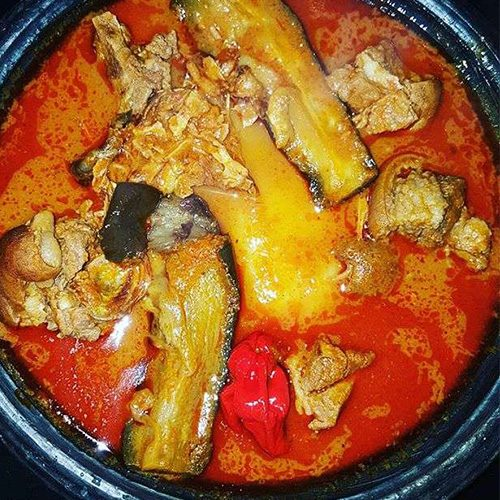

In [18]:
test_example = ds["validation"][3]

test_image = test_example["image"].convert("RGB")
test_image

In [19]:
pixel_values = image_processor(test_image, return_tensors="pt").pixel_values
print(pixel_values.shape)

#torch.Size([1, 3, 224, 224])

torch.Size([1, 3, 224, 224])


In [20]:
with torch.no_grad():
  outputs = model(pixel_values)
  logits = outputs.logits

In [21]:
print(logits.shape)

torch.Size([1, 30])


In [22]:
predicted_class_idx = logits.argmax(-1).item()
print(model.config.id2label[predicted_class_idx])

Palmnut Soup Ghana


In [23]:
from transformers import pipeline
from PIL import Image

model="Kennethdot/convnext_finetuned_ghanaian_food"
pipe = pipeline("image-classification", model=model, image_processor=image_processor)

# Test the pipeline with a sample image from the validation set
test_image = test_ds[0]['image']  # Get the first image from the dataset


# Get predictions
predictions = pipe(test_image)
print(predictions)

Device set to use cpu


[{'label': 'Banku Ghana', 'score': 0.14458529651165009}, {'label': 'Tubaani Ghana', 'score': 0.11129460483789444}, {'label': 'Kyinkyinga Ghana', 'score': 0.09021281450986862}, {'label': 'Waakye Ghana', 'score': 0.07935626059770584}, {'label': 'Ɛtɔ Ghana', 'score': 0.06541968882083893}]


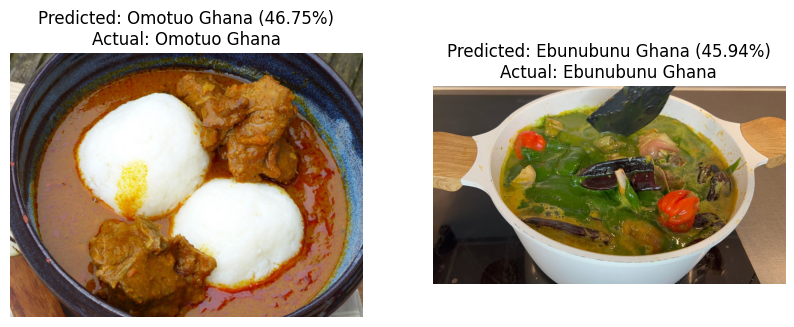

Predicted Class: Omotuo Ghana with score: 0.4675
Actual Class: Omotuo Ghana


In [25]:
import matplotlib.pyplot as plt
from PIL import Image

# Get the image and its actual label
test_image_1 = test_ds[16]['image']  # Replace with an actual image if needed
test_image_2 = test_ds[17]['image']
true_label_1 = test_ds[16]['label']
true_label_2 = test_ds[17]['label']
true_class_1 = labelnames[true_label_1]  # Mapping the label index to the actual class name
true_class_2 = labelnames[true_label_2]

# Get predictions from the model
predictions_1 = pipe(test_image_1)
predictions_2 = pipe(test_image_2)

# Get the class with the highest score
predicted_class_1 = predictions_1[0]['label']
predicted_class_2 = predictions_2[0]['label']
predicted_score_1 = predictions_1[0]['score']
predicted_score_2 = predictions_2[0]['score']

# Create the plot

plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_image_1)
plt.title(f"Predicted: {predicted_class_1} ({predicted_score_1*100:.2f}%)\nActual: {true_class_1}")
plt.axis("off")
plt.subplot(1,2,2)

plt.imshow(test_image_2)
plt.title(f"Predicted: {predicted_class_2} ({predicted_score_2*100:.2f}%)\nActual: {true_class_2}")
plt.axis("off")  # Hide axes
plt.show()

# Print the top prediction and the true label
print(f"Predicted Class: {predicted_class_1} with score: {predicted_score_1:.4f}")
print(f"Actual Class: {true_class_1}")


In [ ]:
from urllib.request import urlopen
from PIL import Image
import io

# Step 1: Provide the image URL
url = "https://th.bing.com/th/id/OIP.CK63U1fYvvceYmvHULZmGQHaHa?rs=1&pid=ImgDetMain"

# Step 2: Download the image
with urlopen(url) as response:
    image_data = response.read()

# Step 3: Convert to an image object (optional, for processing)
image = Image.open(io.BytesIO(image_data))

# Step 4: Display or save the image
image.show()  # Opens the image in the default viewer

In [ ]:
pixel_values = image_processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
import torch

In [ ]:
predictions = pipe(image)

# Get the class with the highest score
predicted_class = predictions[0]['label']
predicted_score = predictions[0]['score']
print(f"Predicted Class: {predicted_class} with score: {predicted_score:.4f}")

Predicted Class: Red Red Ghana with score: 0.9778


In [ ]:
!git clone https://huggingface.co/spaces/Kennethdot/Food_vision

Cloning into 'Food_vision'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.33 KiB | 1.33 MiB/s, done.


In [ ]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 8.0 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from transformers import pipeline


In [26]:
model="Kennethdot/convnext_finetuned_ghanaian_food"
pipe = pipeline("image-classification", model=model, image_processor=image_processor)

Device set to use cpu


In [ ]:
!git add app.py
!git commit -m 'Add application file'
!git push

In [ ]:

gr.Interface.from_pipeline(pipe).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1e529f32eb9c6d0ace.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
gr.deploy()

Need 'write' access token to create a Spaces repo.

Creating new Spaces Repo in '/content'. Collecting metadata, press Enter to accept default value.

Enter Spaces app title [content]: Ghanaian food vision


Formatted to Ghanaian_food_vision.

Enter Gradio app file : Kennethdot/convnext_finetuned_ghanaian_food


FileNotFoundError: Failed to find Gradio app file.